In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
df=pd.read_csv('E://coe projects//diabetes (1).csv')
df.head()
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

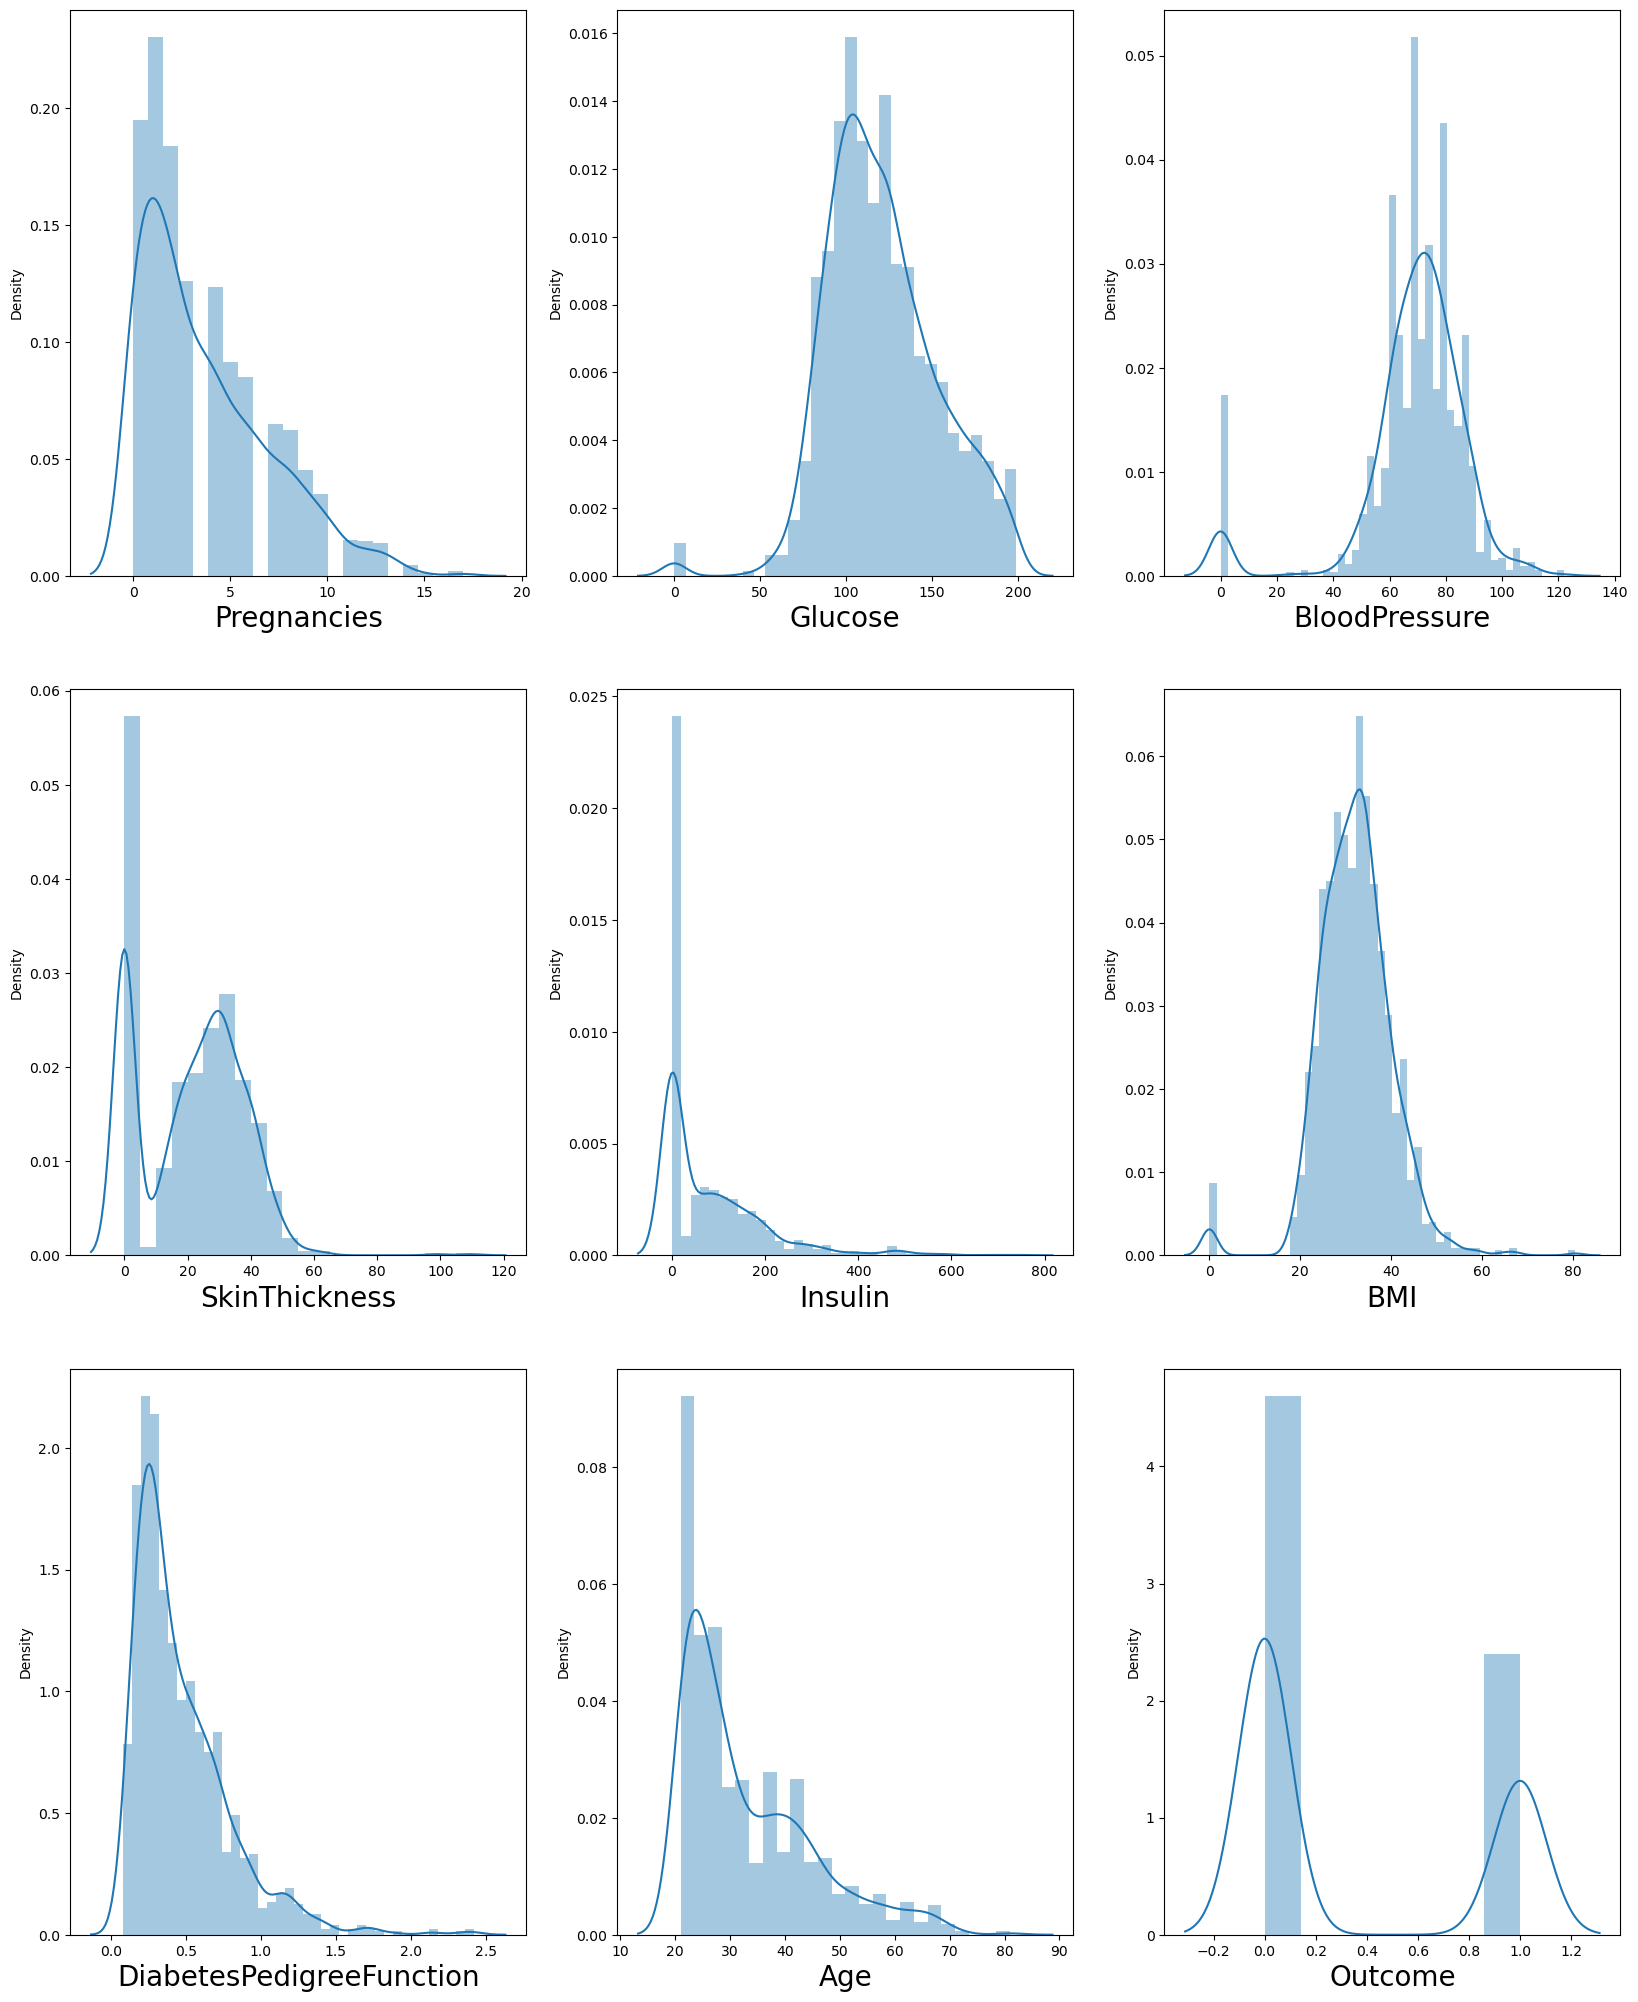

In [25]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

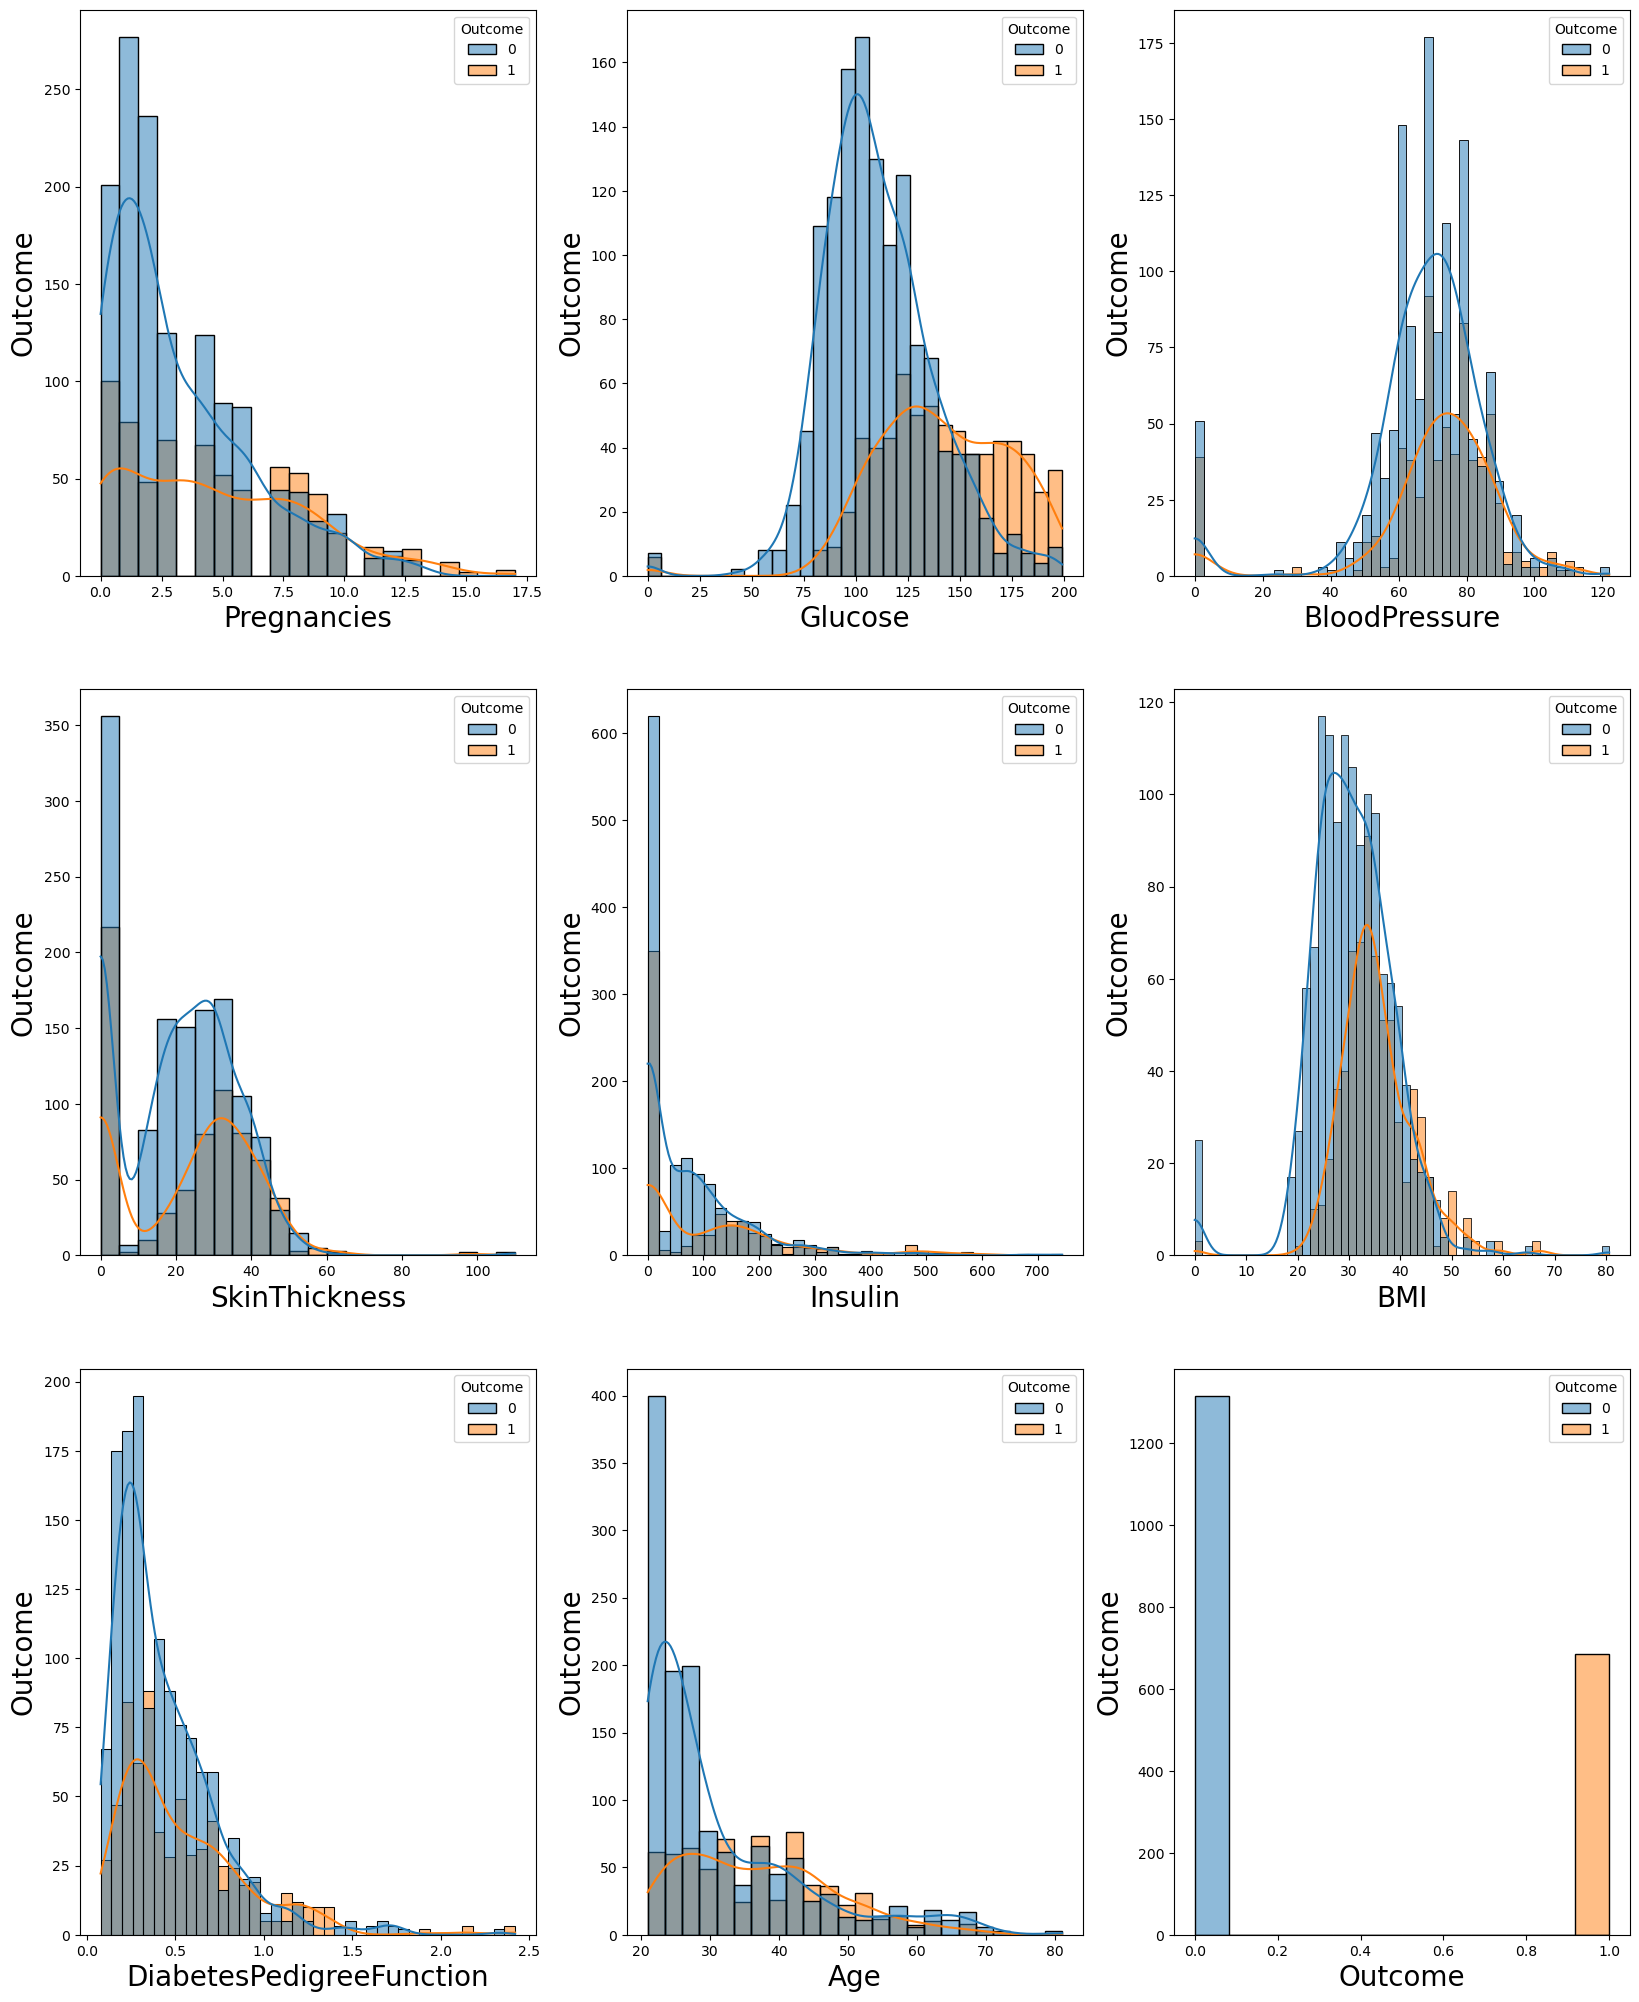

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=df[column],hue=df['Outcome'],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(Glucose_pos, Glucose_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 23.05633354719803
P-value: 1.724006801539328e-104
Reject the null hypothesis


# T-Test 
**Definition:** T-Test is used to compare means when the population variance is unknown or the sample size is small 

---

## Independent T-Test 
    
**Example:** compare **Glucose ** of **Positive vs Negative** person. 

**Hypothesis:** 
-H0: Glucose distribution of positive = Glucose distribution of negative 
-H1: Glucose distribution of positive != Glucose distribution of negative

In [22]:
from scipy import stats
import statsmodels.api as sm
Glucose_pos=df[df['Outcome']==1]['Glucose']
Glucose_negative=df[df['Outcome']==0]['Glucose']
print(Glucose_pos)
print(Glucose_negative)

0       138
2       145
3       135
11      125
16      195
       ... 
1986    104
1991    102
1992    134
1996    179
1998    129
Name: Glucose, Length: 684, dtype: int64
1        84
4       139
5       173
6        99
7       194
       ... 
1993     87
1994     79
1995     75
1997     85
1999     81
Name: Glucose, Length: 1316, dtype: int64


In [29]:
Pregnancies_pos=df[df['Outcome']==1]['Pregnancies']
Pregnancies_negative=df[df['Outcome']==0]['Pregnancies']

In [30]:
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(Pregnancies_pos, Pregnancies_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 10.294740851256517
P-value: 2.968017579508808e-24
Reject the null hypothesis


In [39]:
Blood_pos=df[df['Outcome']==1]['BloodPressure']
Blood_negative=df[df['Outcome']==0]['BloodPressure']
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(Blood_pos, Blood_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 3.405087124758126
P-value: 0.0006745060979594841
Reject the null hypothesis


In [40]:
skin_pos=df[df['Outcome']==1]['SkinThickness']
skin_negative=df[df['Outcome']==0]['SkinThickness']
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(skin_pos, skin_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 3.408791795158821
P-value: 0.0006654655716421974
Reject the null hypothesis


In [37]:
age_pos=df[df['Outcome']==1]['Age']
age_negative=df[df['Outcome']==0]['Age']
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(age_pos, age_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 10.880410795440374
P-value: 7.948733933404598e-27
Reject the null hypothesis


In [34]:
insulin_pos=df[df['Outcome']==1]['Insulin']
insulin_negative=df[df['Outcome']==0]['Insulin']
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(insulin_pos, insulin_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 5.4451214714667575
P-value: 5.814837239580342e-08
Reject the null hypothesis


In [38]:
diabetes_pos=df[df['Outcome']==1]['DiabetesPedigreeFunction']
diabetes_negative=df[df['Outcome']==0]['DiabetesPedigreeFunction']
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(diabetes_pos, diabetes_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 7.034386057932806
P-value: 2.7384134507979468e-12
Reject the null hypothesis


In [33]:
B_pos=df[df['Outcome']==1]['BMI']
B_negative=df[df['Outcome']==0]['BMI']
from scipy import stats

# Perform independent t-test between glucose values
# Glucose_pos  -> glucose values for diabetic patients (Outcome = 1)
# Glucose_negative -> glucose values for non-diabetic patients (Outcome = 0)
t_stat, p_val = stats.ttest_ind(B_pos, B_negative)

# Print t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Hypothesis testing decision
# Null Hypothesis (H0): There is NO significant difference in glucose levels
# Alternative Hypothesis (H1): There IS a significant difference in glucose levels
if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 12.872018209762171
P-value: 1.7467634881773225e-36
Reject the null hypothesis


In [ ]:
# T Test
**column**                 ** pvalue**      **insights**
Glucose                     5.17e-104         effect
SkinThickness               2.99e-16          effect
Pregnancies                 2.96e-24          effect
BloodPressure               4.33e-15          effect
Insulin                     5.814e-08         effect
BMI                         1.74e-36          effect
DiabetesPedigreeFunction    2.73e-12          effect
Age                         7.98e-27          effect


In [10]:
(df[['Glucose','BloodPressure','BMI','Insulin','SkinThickness']] == 0).sum()


Glucose           13
BloodPressure     90
BMI               28
Insulin          956
SkinThickness    573
dtype: int64

# glucose:Blood sugar level after 2 hours
**13 columns contains value 0 which is invalid no one can live without glucose**

# BloodPressure: Diastolic blood pressure (mm Hg)
**approximately should be between 60–80 mm Hg**

# Insulin: Serum insulin level (μU/ml)
**Strongly linked to glucose levels**

# BMI: Body Mass Index (kg/m²)
**BMI > 30 → Obese**
**Action: Normalize or standardize**

# DiabetesPedigreeFunction: Genetic risk of diabetes

# Age: Age of the patient (years)

# SkinThickness – Column Insight: Measures triceps skin fold thickness (in mm), which indicates subcutaneous body fat.

# Outcome (Target Variable): Diabetes status
**0 → Non-diabetic**
**1 → Diabetic**



In [11]:
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.198110,0.042450,-0.052486,0.011404,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.197750,0.167493,0.351246,0.217613,0.123243,0.254496,0.458421
BloodPressure,0.198110,0.197750,1.000000,0.165234,-0.021063,0.259283,0.012466,0.323659,0.174184
SkinThickness,0.042450,0.167493,0.165234,1.000000,0.255889,0.526836,0.133548,0.059255,0.181365
Insulin,-0.052486,0.351246,-0.021063,0.255889,1.000000,0.217600,0.181461,-0.052681,0.145165
BMI,0.011404,0.217613,0.259283,0.526836,0.217600,1.000000,0.142019,0.018731,0.282515
DiabetesPedigreeFunction,-0.025453,0.123243,0.012466,0.133548,0.181461,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.323659,0.059255,-0.052681,0.018731,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.174184,0.181365,0.145165,0.282515,0.155459,0.236509,1.000000


In [41]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

print(x.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  
0                     0.127   47  
1                     0.233   23  
2                     0.630   31  
3                     0.365   24  
4                     0.536   21  
0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64


In [45]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-0.5153943 ,  0.52455322, -0.37248123, ...,  0.17268332,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.67008046, ...,  0.73724853,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -3.60442246, ...,  1.47363794,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46156812, ..., -0.12187245,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  2.12966682, ...,  4.28419085,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895,  0.14879962, ..., -0.25687717,
         0.23516743, -0.68659705]])

In [47]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.065814e-17,-1.563194e-16,8.704149e-17,1.172396e-16,-3.108624e-17,2.557954e-16,1.225686e-16,1.136868e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.120495e+00,-3.779793e+00,-3.604422e+00,-1.300374e+00,-7.220155e-01,-3.951097e+00,-1.214728e+00,-1.026055e+00
25%,-8.179445e-01,-6.918925e-01,-2.942891e-01,-1.300374e+00,-7.220155e-01,-5.913207e-01,-7.015452e-01,-7.714617e-01
50%,-2.128441e-01,-1.304560e-01,1.487996e-01,1.282671e-01,-3.621503e-01,1.313228e-02,-2.934724e-01,-3.471387e-01
75%,6.948066e-01,6.181260e-01,5.658243e-01,6.873005e-01,4.475463e-01,5.654243e-01,4.732099e-01,5.863720e-01
max,4.022859e+00,2.427199e+00,2.755204e+00,5.532257e+00,5.971477e+00,5.941067e+00,6.025474e+00,4.065821e+00


In [49]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x_scaled_norm=norm.fit_transform(x)
x_scaled_norm=pd.DataFrame(x_scaled_norm,columns=x.columns)
x_scaled_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000


In [50]:
x_scaled_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.217853,0.608957,0.566766,0.190318,0.107868,0.399417,0.167775,0.201508
std,0.194474,0.161149,0.157281,0.146393,0.149436,0.101115,0.138152,0.196440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.520492,0.000000,0.000000,0.339640,0.070880,0.050000
50%,0.176471,0.587940,0.590164,0.209091,0.053763,0.400744,0.127242,0.133333
75%,0.352941,0.708543,0.655738,0.290909,0.174731,0.456576,0.233134,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append({i: np.mean(pred_i != y_test)})

In [59]:
error_rate

[{1: np.float64(0.0175)},
 {2: np.float64(0.1025)},
 {3: np.float64(0.1475)},
 {4: np.float64(0.185)},
 {5: np.float64(0.21)},
 {6: np.float64(0.175)},
 {7: np.float64(0.19)},
 {8: np.float64(0.2075)},
 {9: np.float64(0.225)},
 {10: np.float64(0.24)}]

In [15]:
print(df.columns.tolist())
print(type(df))


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>


In [24]:
print(len(x_train))
print(len(x_test))

1600
400


In [25]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict=LR.predict(x_test)

In [27]:
y_predict

array([ 4.91804713e-01,  4.56807205e-02,  8.05042708e-01,  5.93826593e-01,
        5.63336041e-01,  5.14052949e-01,  5.14782697e-01,  2.61812799e-01,
        1.88098806e-01,  2.74725304e-01,  8.07774976e-01,  2.87704354e-02,
        9.60599831e-01,  3.18956998e-01,  4.14242882e-01,  3.18575399e-01,
        6.01049738e-01,  2.44346565e-01,  1.87619064e-01,  3.59747429e-01,
        3.77192890e-01,  2.16605526e-01,  4.75750912e-01,  1.35646947e-01,
        3.38509021e-01,  4.24764649e-01,  4.16226261e-01, -2.21173459e-01,
        2.25010875e-01,  1.55450449e-01,  4.09640725e-01,  2.13339836e-01,
        2.42149288e-01,  4.58608161e-01,  1.88071582e-01, -1.10030111e-01,
        3.90039768e-01,  5.97785232e-01,  1.67393879e-01,  3.16823383e-01,
        1.66242907e-01, -1.27973562e-01,  2.32864281e-01,  7.07781211e-03,
        9.29271544e-01,  2.29506686e-01,  2.76131905e-01,  2.68005296e-01,
        2.21061483e-01,  6.68603197e-01,  4.42570162e-01,  5.21210979e-01,
        5.20931210e-01,  

In [28]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.2893118982944639

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

In [39]:
df.columns = df.columns.str.strip()

In [41]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


In [42]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy :", test_accuracy)


Training Accuracy: 0.7725
Testing Accuracy : 0.795


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[[232  21]
 [ 61  86]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       253
           1       0.80      0.59      0.68       147

    accuracy                           0.80       400
   macro avg       0.80      0.75      0.76       400
weighted avg       0.80      0.80      0.79       400

